# Problem Statement

Given is the diabetes dataset. Build an ensemble model to correctly classify the outcome variable and improve your model prediction by using GridSearchCV. You must apply Bagging, Boosting, Stacking, and Voting on the dataset.  

---------------------- #### -------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
data = pd.read_csv('Diabeted_Ensemble.csv')
data.shape

(768, 9)

We have 768 rows and 9 columns in our dataset

Lets explore our dataset

In [3]:
data.columns

Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', ' Class variable'],
      dtype='object')

In [4]:
data.dtypes

 Number of times pregnant          int64
 Plasma glucose concentration      int64
 Diastolic blood pressure          int64
 Triceps skin fold thickness       int64
 2-Hour serum insulin              int64
 Body mass index                 float64
 Diabetes pedigree function      float64
 Age (years)                       int64
 Class variable                   object
dtype: object

Lets check for any missing value in our dataset

<AxesSubplot:>

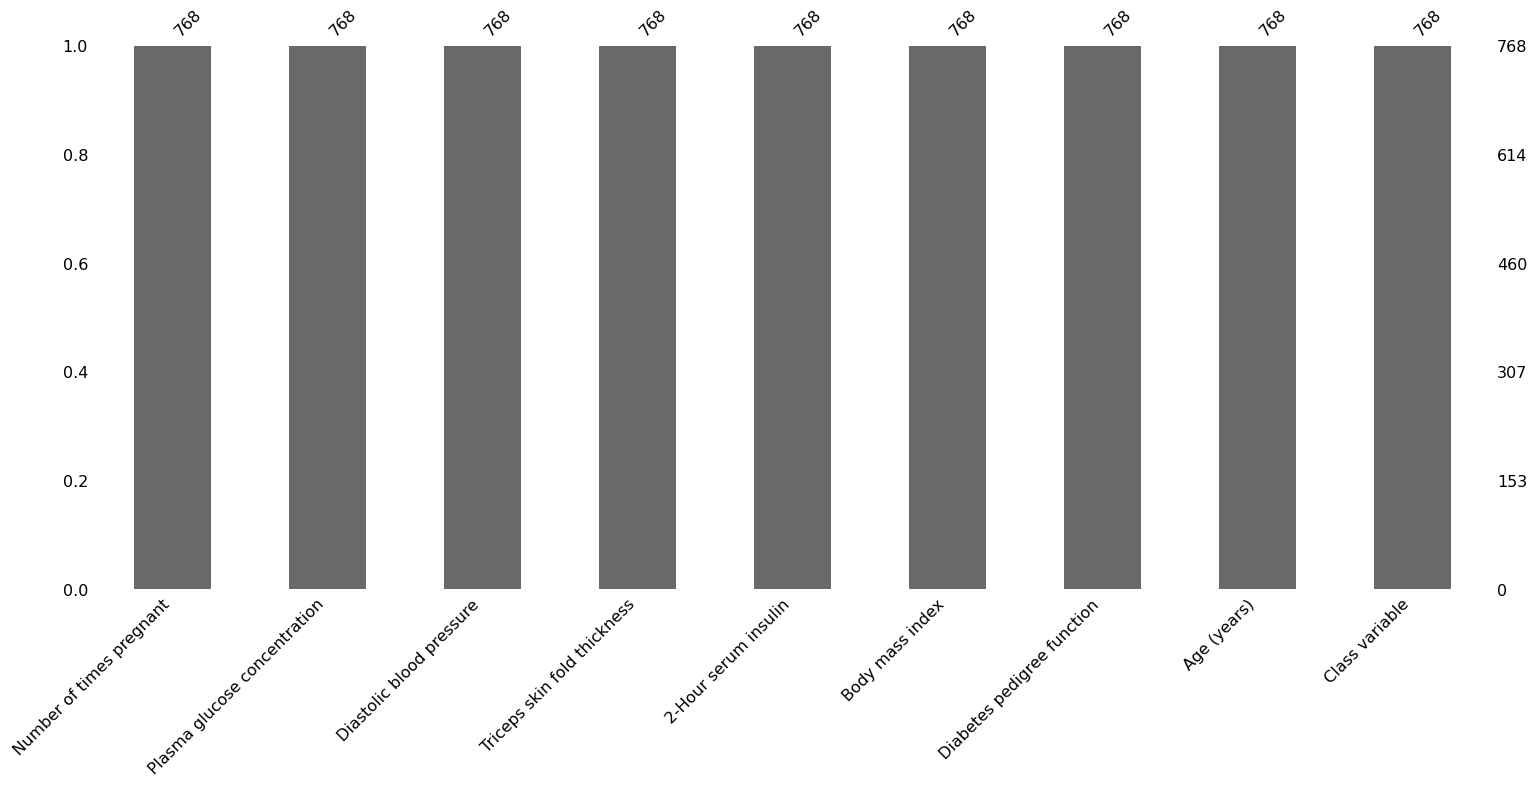

In [5]:
msno.bar(data)

There are no missing value in our dataset

Lets see how related columns are with each other

In our dataset columns we have lot of spaces, lets clean our dataset column names

In [6]:
data.columns = data.columns.str.replace(" ","")

In [7]:
data.columns

Index(['Numberoftimespregnant', 'Plasmaglucoseconcentration',
       'Diastolicbloodpressure', 'Tricepsskinfoldthickness',
       '2-Hourseruminsulin', 'Bodymassindex', 'Diabetespedigreefunction',
       'Age(years)', 'Classvariable'],
      dtype='object')

<AxesSubplot:>

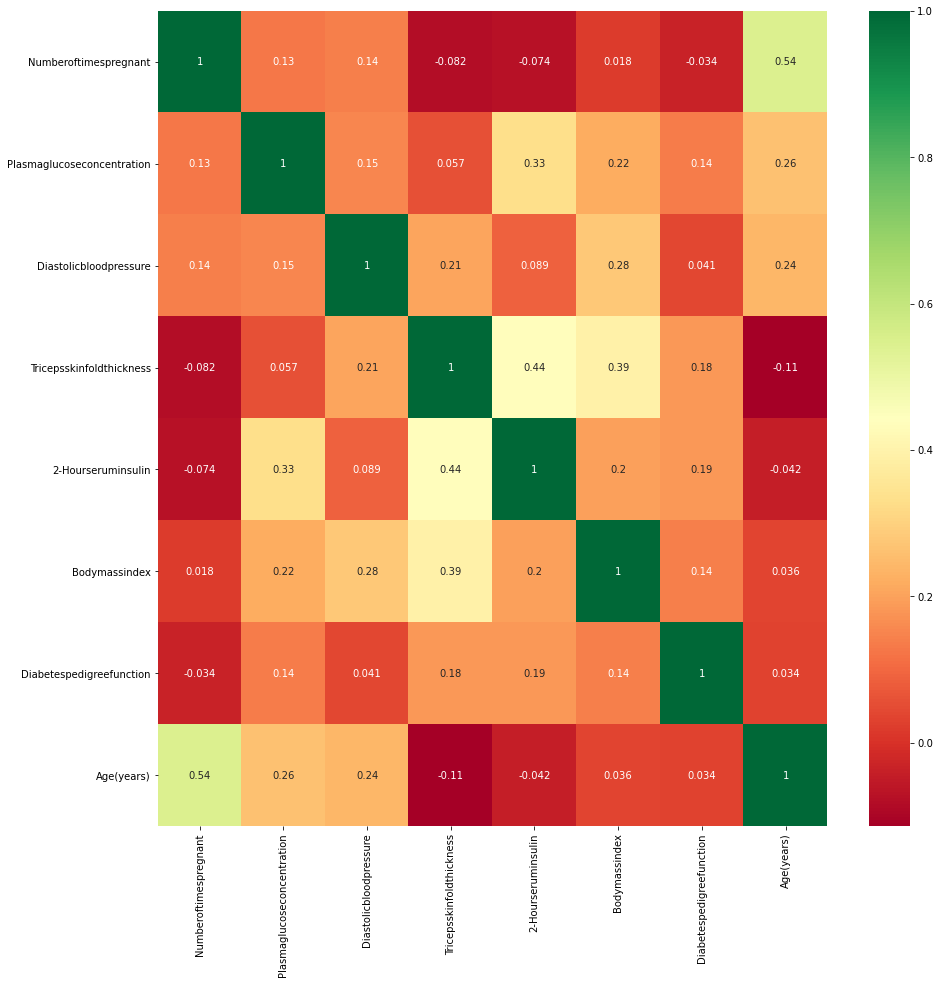

In [8]:
plt.rcParams['figure.figsize']=(15,15)

sns.heatmap(data[['Numberoftimespregnant', 'Plasmaglucoseconcentration',
       'Diastolicbloodpressure', 'Tricepsskinfoldthickness',
       '2-Hourseruminsulin', 'Bodymassindex', 'Diabetespedigreefunction',
       'Age(years)']].corr(),cmap='RdYlGn', annot=True)

Our Class Variable column is Yes or No, we will use Label Encoder to convert them into 1 and 0

In [9]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

data['Classvariable'] = lb.fit_transform(data['Classvariable'])
data.head()

,Numberoftimespregnant,Plasmaglucoseconcentration,Diastolicbloodpressure,Tricepsskinfoldthickness,2-Hourseruminsulin,Bodymassindex,Diabetespedigreefunction,Age(years),Classvariable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1 = Yes and 0 = No

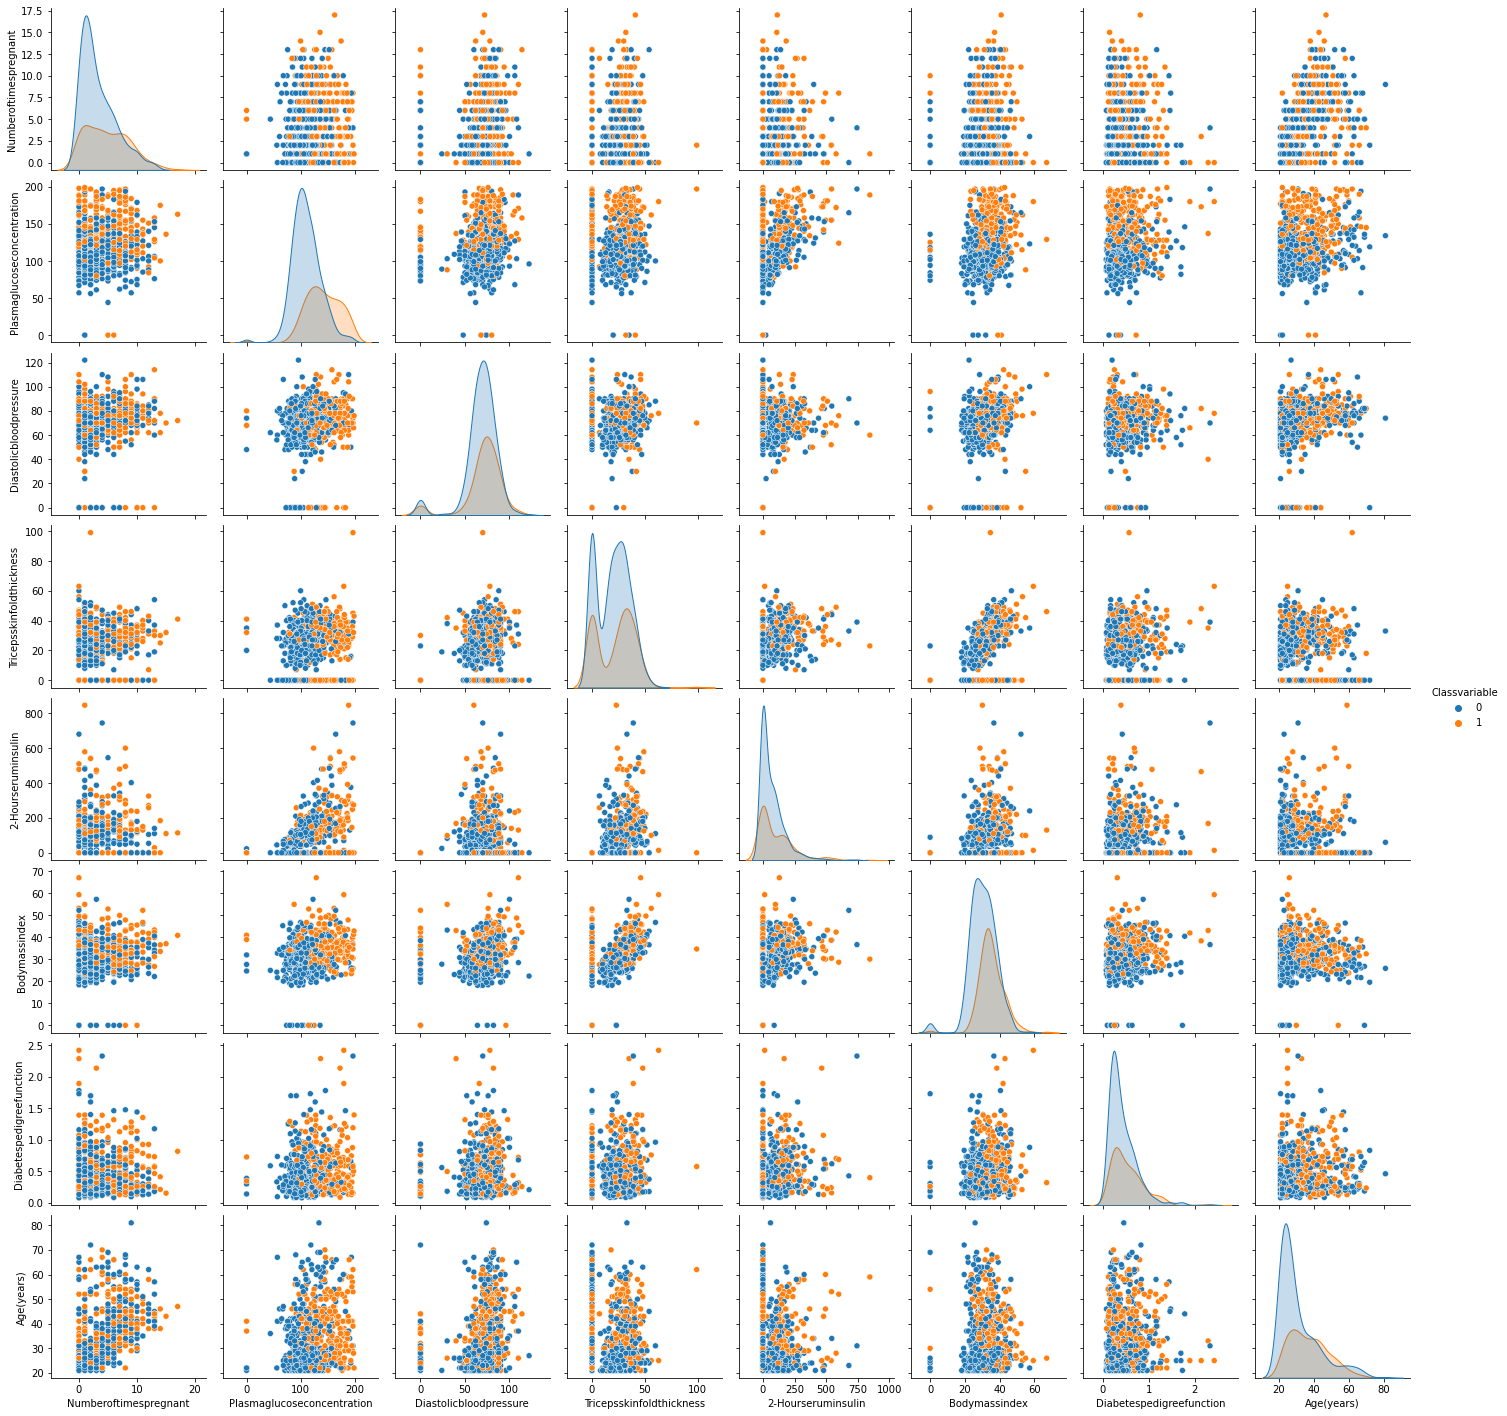

In [10]:
sns.pairplot(data,hue='Classvariable')

In [11]:
data['Classvariable'].value_counts()

0    500
1    268
Name: Classvariable, dtype: int64

We will now start building our models

In [12]:
predictors = data.loc[:, data.columns!='Classvariable']
target = data['Classvariable']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(predictors,target, test_size=0.3, random_state=123)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(537, 8) (231, 8) (537,) (231,)


In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
import xgboost as xgb

In [15]:
xgb_clf = xgb.XGBClassifier(max_depths = 5, n_estimators = 5000, learning_rate = 0.2, n_jobs = -1)


In [16]:
xgb_clf.fit(x_train, y_train)


C:\Users\jaich\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6, max_depths=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [18]:
# Evaluation on Testing Data
confusion_matrix(y_test, xgb_clf.predict(x_test))
accuracy_score(y_test, xgb_clf.predict(x_test))

0.7619047619047619

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

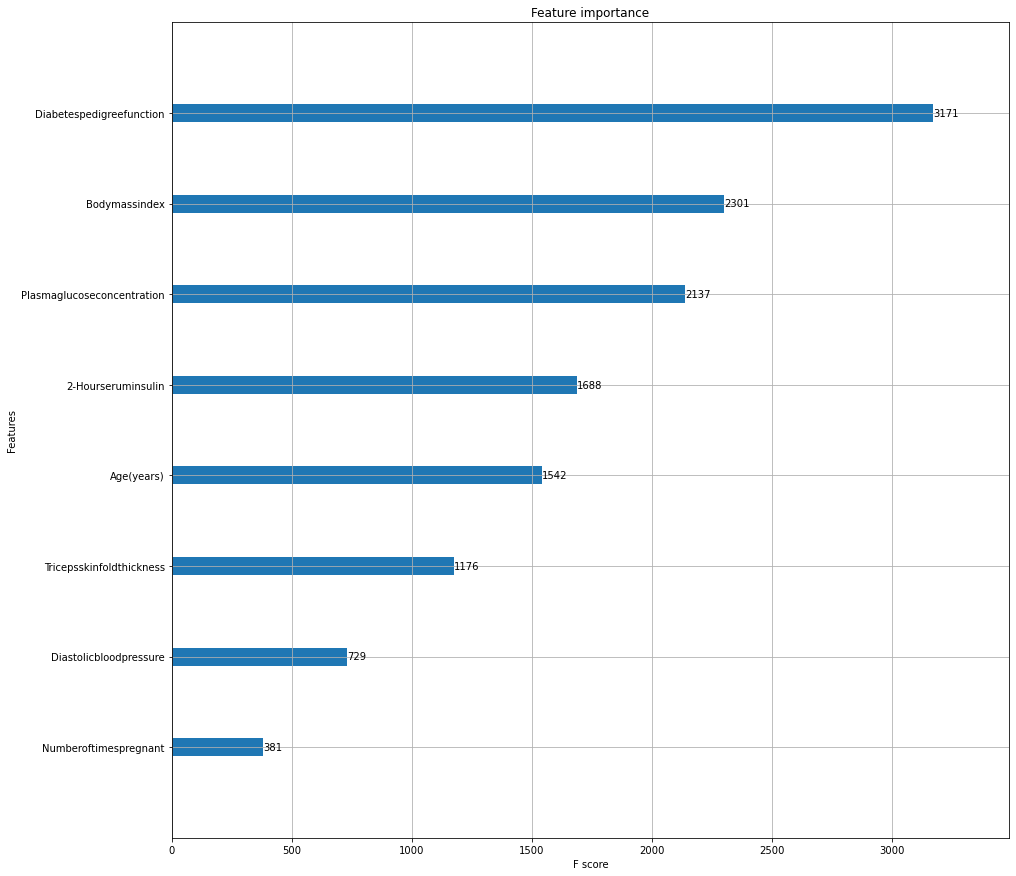

In [19]:
xgb.plot_importance(xgb_clf)


In [20]:
xgb_clf = xgb.XGBClassifier(max_depths = 5, n_estimators = 10000, learning_rate = 0.3, n_jobs = -1)
#xgb_clf.fit(x_train, y_train)

In [21]:
param_test1 = {'max_depth': range(3,10,2), 'gamma': [0.1, 0.2, 0.3],
               'subsample': [0.8, 0.9], 'colsample_bytree': [0.8, 0,9],
               'rag_alpha': [1e-2, 0.1, 1]}

In [22]:
grid_search = GridSearchCV(xgb_clf, param_test1, n_jobs = -1, cv = 5, scoring = 'accuracy')

In [23]:
grid_search.fit(x_train, y_train)


C:\Users\jaich\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.71516096 0.72255106 0.71516096 0.72255106 0.71516096 0.72255106
 0.71514365 0.70951886 0.71514365 0.70951886 0.71514365 0.70951886
 0.71322257 0.70771893 0.71322257 0.70771893 0.71322257 0.70771893
 0.72258567 0.72447214 0.72258567 0.72447214 0.72258567 0.72447214
 0.70768432 0.71142264 0.70768432 0.71142264 0.70768432 0.71142264
 0.71893389 0.71516096 0.71893389 0.71516096 0.71893389 0.71516096
 0.72262028 0.71893389 0.72262028 0.71893389 0.72262028 0.71893389
 0.71884735 0.72455867 0.71884735 0.72455867 0.71884735 0.72455867
 0.71886466 0.71516096 0.71886466 0.71516096 0.71886466 0.71516096
 0.7113361  0.71696089 0.7113361  0.71696089 0.7113361  0.71696089
 0.70768432 0.71323988 0.70768432 0.71323988 0.70768432 0.71323988
 0.71883004 0.72817584 0.71883004 0.72817584 0.71883004 0.72817584
 0.70953617 0.70209415 0.70953617 0.70209415 0.709536

[18:34:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths", "rag_alpha" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:34:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_delta_step=None,
                                     max_depth=None, max_depths=5,
                                     min_child_weight=None, missing=nan,
                                     monotone_constraints=None,
                                     n_estimators=10000, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
    

In [24]:
cv_xg_clf = grid_search.best_estimator_
cv_xg_clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=9, max_depths=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=-1, num_parallel_tree=1,
              rag_alpha=0.01, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [25]:
# Evaluation on Testing Data with model with hyperparameter
accuracy_score(y_test, cv_xg_clf.predict(x_test))

0.7705627705627706

In [26]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.3,
 'max_depth': 9,
 'rag_alpha': 0.01,
 'subsample': 0.9}

# AdaBoostClassifier

In [27]:
from sklearn.ensemble import AdaBoostClassifier

In [28]:
ada_clf = AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)
ada_clf.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [29]:
confusion_matrix(y_test, ada_clf.predict(x_test))


array([[116,  27],
       [ 33,  55]], dtype=int64)

In [30]:
accuracy_score(y_test, ada_clf.predict(x_test))


0.7402597402597403

In [31]:
# Evaluation on Training Data
accuracy_score(y_train, ada_clf.predict(x_train))


0.8621973929236499

# Bagging_Classification

In [32]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier

In [33]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=500, bootstrap=True, n_jobs=1, random_state=42)

In [34]:
bag_clf.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=1, random_state=42)

In [35]:
# Evaluation on Testing Data
confusion_matrix(y_test, bag_clf.predict(x_test))

array([[114,  29],
       [ 25,  63]], dtype=int64)

In [36]:
accuracy_score(y_test, bag_clf.predict(x_test))

0.7662337662337663

# Stacking_Classification

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import metrics

### Creating the ensembles base learners and meta learner

In [38]:
base_learners = []

#### KNN Classifier model

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)
base_learners.append(knn)

#### Decision Tree Classifier model

In [40]:
dtr = DecisionTreeClassifier(max_depth=4, random_state=123)
base_learners.append(dtr)

#### Multi Layered Perception classifier

In [42]:
mlpc = MLPClassifier(hidden_layer_sizes=(100,), solver = 'lbfgs', random_state=123)
base_learners.append(mlpc)

#### Meta Model Using Logistic Regression

In [43]:
meta_learner = LogisticRegression(solver='lbfgs')

In [55]:
# Create variables to store meta data and the targets
meta_data = np.zeros((len(base_learners), len(x_train)))
meta_targets = np.zeros(len(y_train))

In [59]:
# Create the cross-validation folds
KF = KFold(n_splits = 5)
meta_index = 0
for train_indices, test_indices in KF.split(x_train):
    # Train each learner on the K-1 folds and create meta data for the Kth fold
    for i in range(len(base_learners)):
        learner = base_learners[i]

        learner.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
        predictions = learner.predict_proba(x_train.iloc[test_indices])[:,0]

        meta_data[i][meta_index:meta_index+len(test_indices)] = predictions

    meta_targets[meta_index:meta_index+len(test_indices)] = y_train.iloc[test_indices]
    meta_index += len(test_indices)

C:\Users\jaich\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jaich\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jaich\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

In [60]:
# Transpose the meta data to be fed into the meta learner
meta_data = meta_data.transpose()

In [62]:
# Create the meta data for the test set and evaluate the base learners
test_meta_data = np.zeros((len(base_learners), len(x_test)))
base_acc = []

for i in range(len(base_learners)):
    learner = base_learners[i]
    learner.fit(x_train, y_train)
    predictions = learner.predict_proba(x_test)[:,0]
    test_meta_data[i] = predictions

    acc = metrics.accuracy_score(y_test, learner.predict(x_test))
    base_acc.append(acc)
test_meta_data = test_meta_data.transpose()

C:\Users\jaich\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [63]:
# Fit the meta learner on the train set and evaluate it on the test set
meta_learner.fit(meta_data, meta_targets)
ensemble_predictions = meta_learner.predict(test_meta_data)

In [66]:
acc = metrics.accuracy_score(y_test, ensemble_predictions)
acc

0.7316017316017316

In [67]:
# Print the results
for i in range(len(base_learners)):
    learner = base_learners[i]

    print(f'{base_acc[i]:.2f} {learner.__class__.__name__}')
    
print(f'{acc:.2f} Ensemble')

0.71 KNeighborsClassifier
0.72 DecisionTreeClassifier
0.70 MLPClassifier
0.73 Ensemble


#### Voting Hard and Soft

In [69]:
from sklearn import linear_model, svm, neighbors, naive_bayes
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Instantiate the learners (classifiers)
learner_1 = neighbors.KNeighborsClassifier(n_neighbors=5)
learner_2 = linear_model.Perceptron(tol=1e-2, random_state=0)
learner_3 = svm.SVC(gamma=0.001)

In [70]:
# Instantiate the voting classifier
voting = VotingClassifier([('KNN', learner_1),
                           ('Prc', learner_2),
                           ('SVM', learner_3)])

In [71]:
# Fit classifier with the training data
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier()),
                             ('Prc', Perceptron(tol=0.01)),
                             ('SVM', SVC(gamma=0.001))])

In [72]:
# Predict the most voted class
hard_predictions = voting.predict(x_test)

In [73]:
# Accuracy of hard voting
print('Hard Voting:', accuracy_score(y_test, hard_predictions))

Hard Voting: 0.7445887445887446


####### Soft Voting

In [74]:
# Instantiate the learners (classifiers)
learner_4 = neighbors.KNeighborsClassifier(n_neighbors = 5)
learner_5 = naive_bayes.GaussianNB()
learner_6 = svm.SVC(gamma = 0.001, probability = True)

In [75]:
# Instantiate the voting classifier
voting = VotingClassifier([('KNN', learner_4),
                           ('NB', learner_5),
                           ('SVM', learner_6)],
                            voting = 'soft')

In [76]:
# Fit classifier with the training data
voting.fit(x_train, y_train)
learner_4.fit(x_train, y_train)
learner_5.fit(x_train, y_train)
learner_6.fit(x_train, y_train)

SVC(gamma=0.001, probability=True)

In [77]:
# Predict the most probable class
soft_predictions = voting.predict(x_test)

In [78]:
# Get the base learner predictions
predictions_4 = learner_4.predict(x_test)
predictions_5 = learner_5.predict(x_test)
predictions_6 = learner_6.predict(x_test)

In [79]:
# Accuracies of base learners
print('L4:', accuracy_score(y_test, predictions_4))
print('L5:', accuracy_score(y_test, predictions_5))
print('L6:', accuracy_score(y_test, predictions_6))

L4: 0.7272727272727273
L5: 0.7792207792207793
L6: 0.7532467532467533


In [80]:
# Accuracy of Soft voting
print('Soft Voting:', accuracy_score(y_test, soft_predictions))

Soft Voting: 0.7619047619047619


# Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=1, random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500, n_jobs=1, random_state=42)

In [83]:
confusion_matrix(y_test, rf_clf.predict(x_test))

array([[121,  22],
       [ 29,  59]], dtype=int64)

In [84]:
accuracy_score(y_test, rf_clf.predict(x_test))

0.7792207792207793

## Stacking Regression

In [85]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import KFold
from sklearn import metrics

In [86]:
# Create the ensemble's base learners and meta-learner
# Append base learners to a list
base_learners = []

In [87]:
# KNN regression model
knn = KNeighborsRegressor(n_neighbors=5)
base_learners.append(knn)

In [88]:
# Decision Tree regressor model
dtr = DecisionTreeRegressor(max_depth=4, random_state=123456)
base_learners.append(dtr)

In [89]:
# Ridge regression
ridge = Ridge()
base_learners.append(ridge)

In [90]:
# Meta model using linear regerssion model
meta_learner = LinearRegression()

In [91]:
# Create variables to store meta data and the targets
meta_data = np.zeros((len(base_learners), len(x_train)))
meta_targets = np.zeros(len(y_train))

In [94]:
# Create the cross-validation folds
KF = KFold(n_splits = 5)
meta_index = 0
for train_indices, test_indices in KF.split(x_train):
    # Train each learner on the K-1 folds and create meta data for the Kth fold
    for i in range(len(base_learners)):
        learner = base_learners[i]

        learner.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
        predictions = learner.predict(x_train.iloc[test_indices])

        meta_data[i][meta_index:meta_index+len(test_indices)] = predictions

    meta_targets[meta_index:meta_index+len(test_indices)] = y_train.iloc[test_indices]
    meta_index += len(test_indices)

In [95]:
# Transpose the metadata to be fed into the meta-learner
meta_data = meta_data.transpose()

In [96]:
# Create the metadata for the test set and evaluate the base learners
test_meta_data = np.zeros((len(base_learners), len(x_test)))
base_errors = []
base_r2 = []
for i in range(len(base_learners)):
  learner = base_learners[i]
  learner.fit(x_train, y_train)
  predictions = learner.predict(x_test)
  test_meta_data[i] = predictions

  err = metrics.mean_squared_error(y_test, predictions)
  r2 = metrics.r2_score(y_test, predictions)

  base_errors.append(err)
  base_r2.append(r2)

test_meta_data = test_meta_data.transpose()

In [97]:
# Fit the meta-learner on the train set and evaluate it on the test set
meta_learner.fit(meta_data, meta_targets)
ensemble_predictions = meta_learner.predict(test_meta_data)

In [99]:
err = metrics.mean_squared_error(y_test, ensemble_predictions)
r2 = metrics.r2_score(y_test, ensemble_predictions)

In [100]:
# Print the results 
for i in range(len(base_learners)):
  learner = base_learners[i]
  print(f'{base_errors[i]:.1f} {base_r2[i]:.2f} {learner.__class__.__name__}')
print(f'{err:.1f} {r2:.2f} Ensemble')

0.2 0.22 KNeighborsRegressor
0.2 0.20 DecisionTreeRegressor
0.2 0.36 Ridge
0.2 0.35 Ensemble


From above all the models we created AdaBoost Classifier has the best accuracy of 86.21%